In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print(insurance.shape)

(1338, 7)


<AxesSubplot:ylabel='Frequency'>

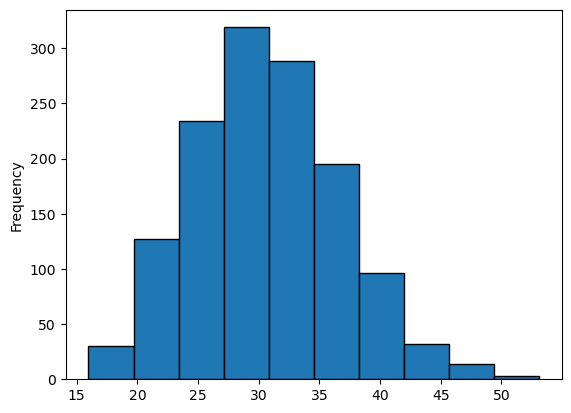

In [7]:
insurance['bmi'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

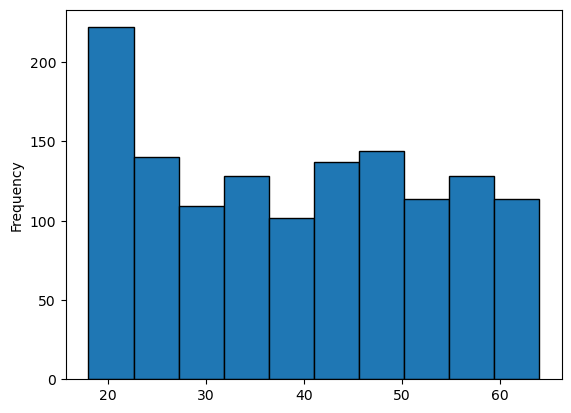

In [8]:
insurance['age'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

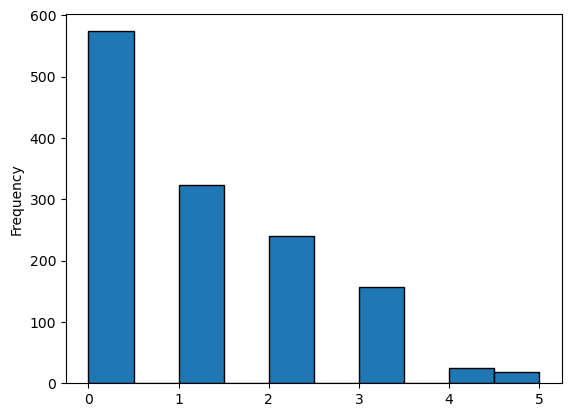

In [9]:
insurance['children'].plot(kind='hist', edgecolor='black')

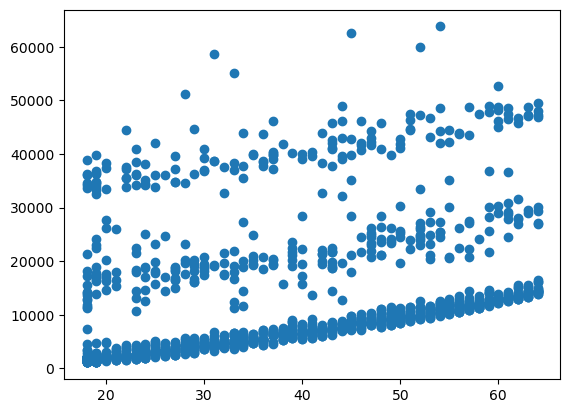

In [10]:
plt.scatter('age', 'charges', data = insurance)

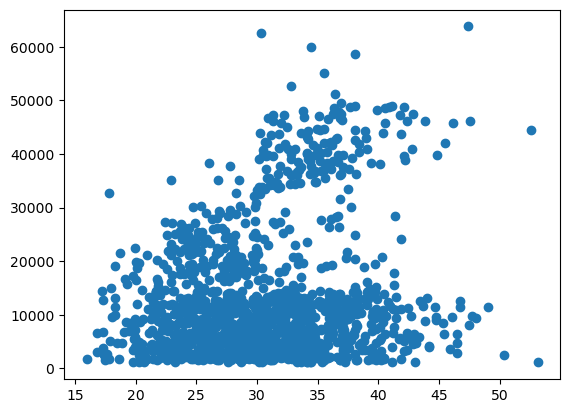

In [11]:
plt.scatter('bmi', 'charges', data = insurance)

<AxesSubplot:xlabel='sex', ylabel='count'>

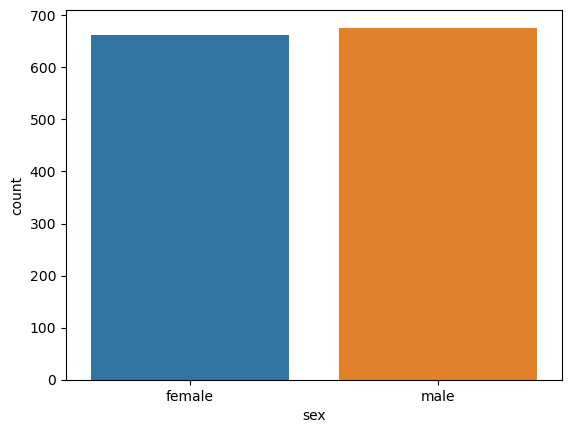

In [12]:
sbn.countplot(x='sex', data = insurance)

<AxesSubplot:xlabel='children', ylabel='count'>

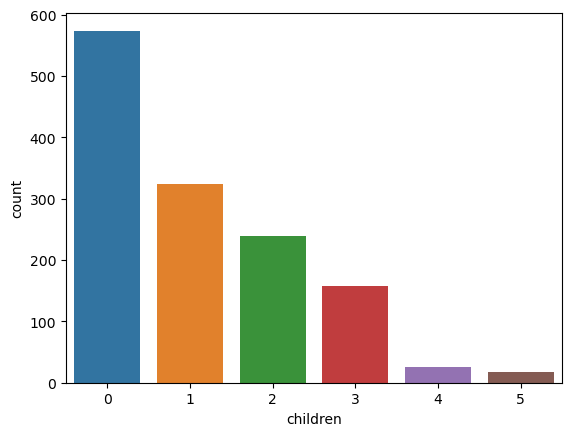

In [13]:
sbn.countplot(x='children', data = insurance)

<AxesSubplot:xlabel='smoker', ylabel='count'>

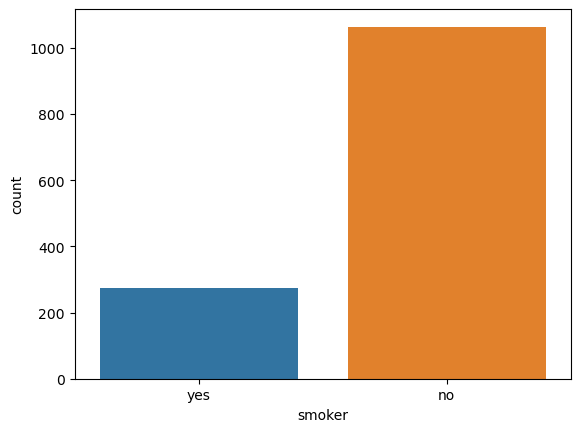

In [14]:
sbn.countplot(x='smoker', data = insurance)

<AxesSubplot:xlabel='region', ylabel='count'>

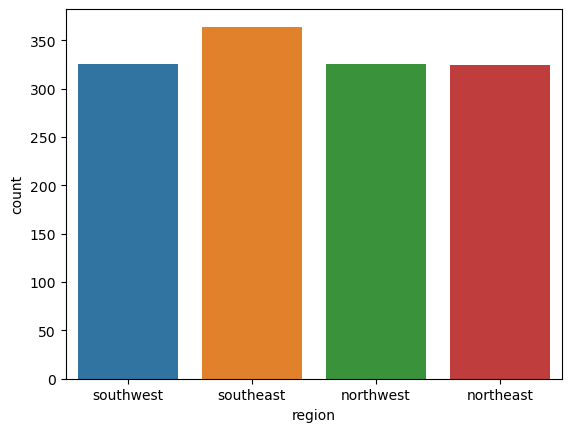

In [15]:
sbn.countplot(x='region', data = insurance)

<AxesSubplot:xlabel='charges', ylabel='sex'>

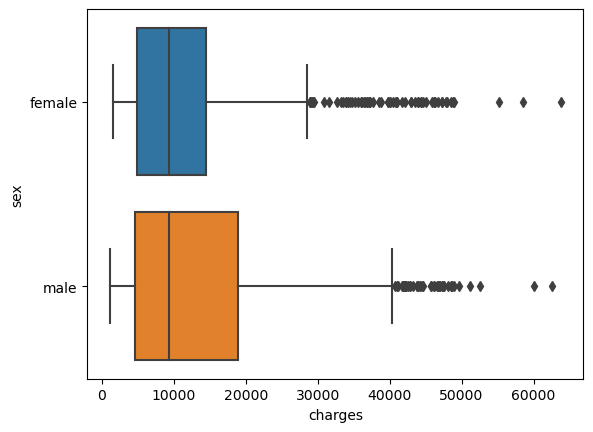

In [16]:
sbn.boxplot(data=insurance, x='charges', y='sex')

<AxesSubplot:xlabel='charges', ylabel='region'>

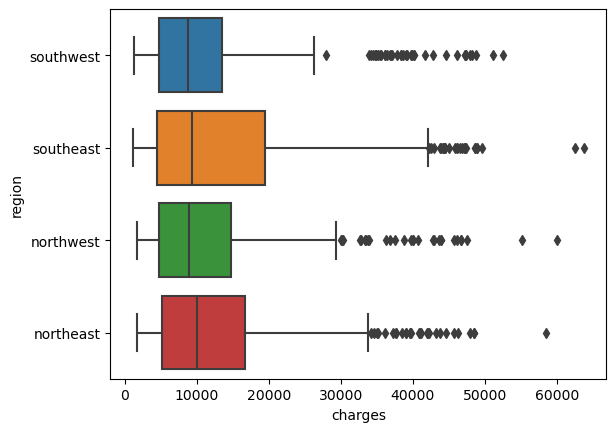

In [17]:
sbn.boxplot(data=insurance, x='charges', y='region')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

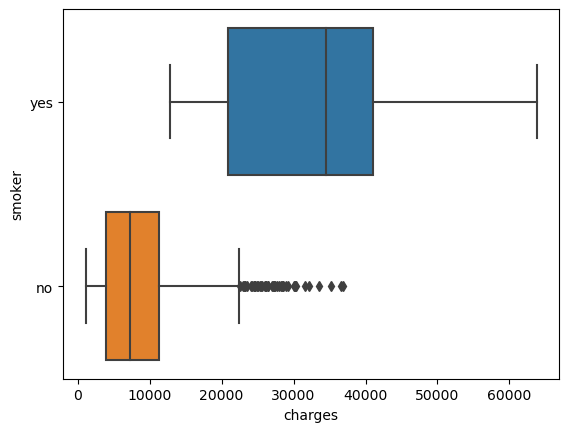

In [18]:
sbn.boxplot(data=insurance, x='charges', y='smoker')

In [19]:
insurance4=insurance.copy()

In [20]:
insurance4 = pd.get_dummies(insurance4, columns=['region', 'sex', 'smoker'])

In [21]:
insurance4.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,1,0


Text(0.5, 1.0, "Pearson's Correlation Chart")

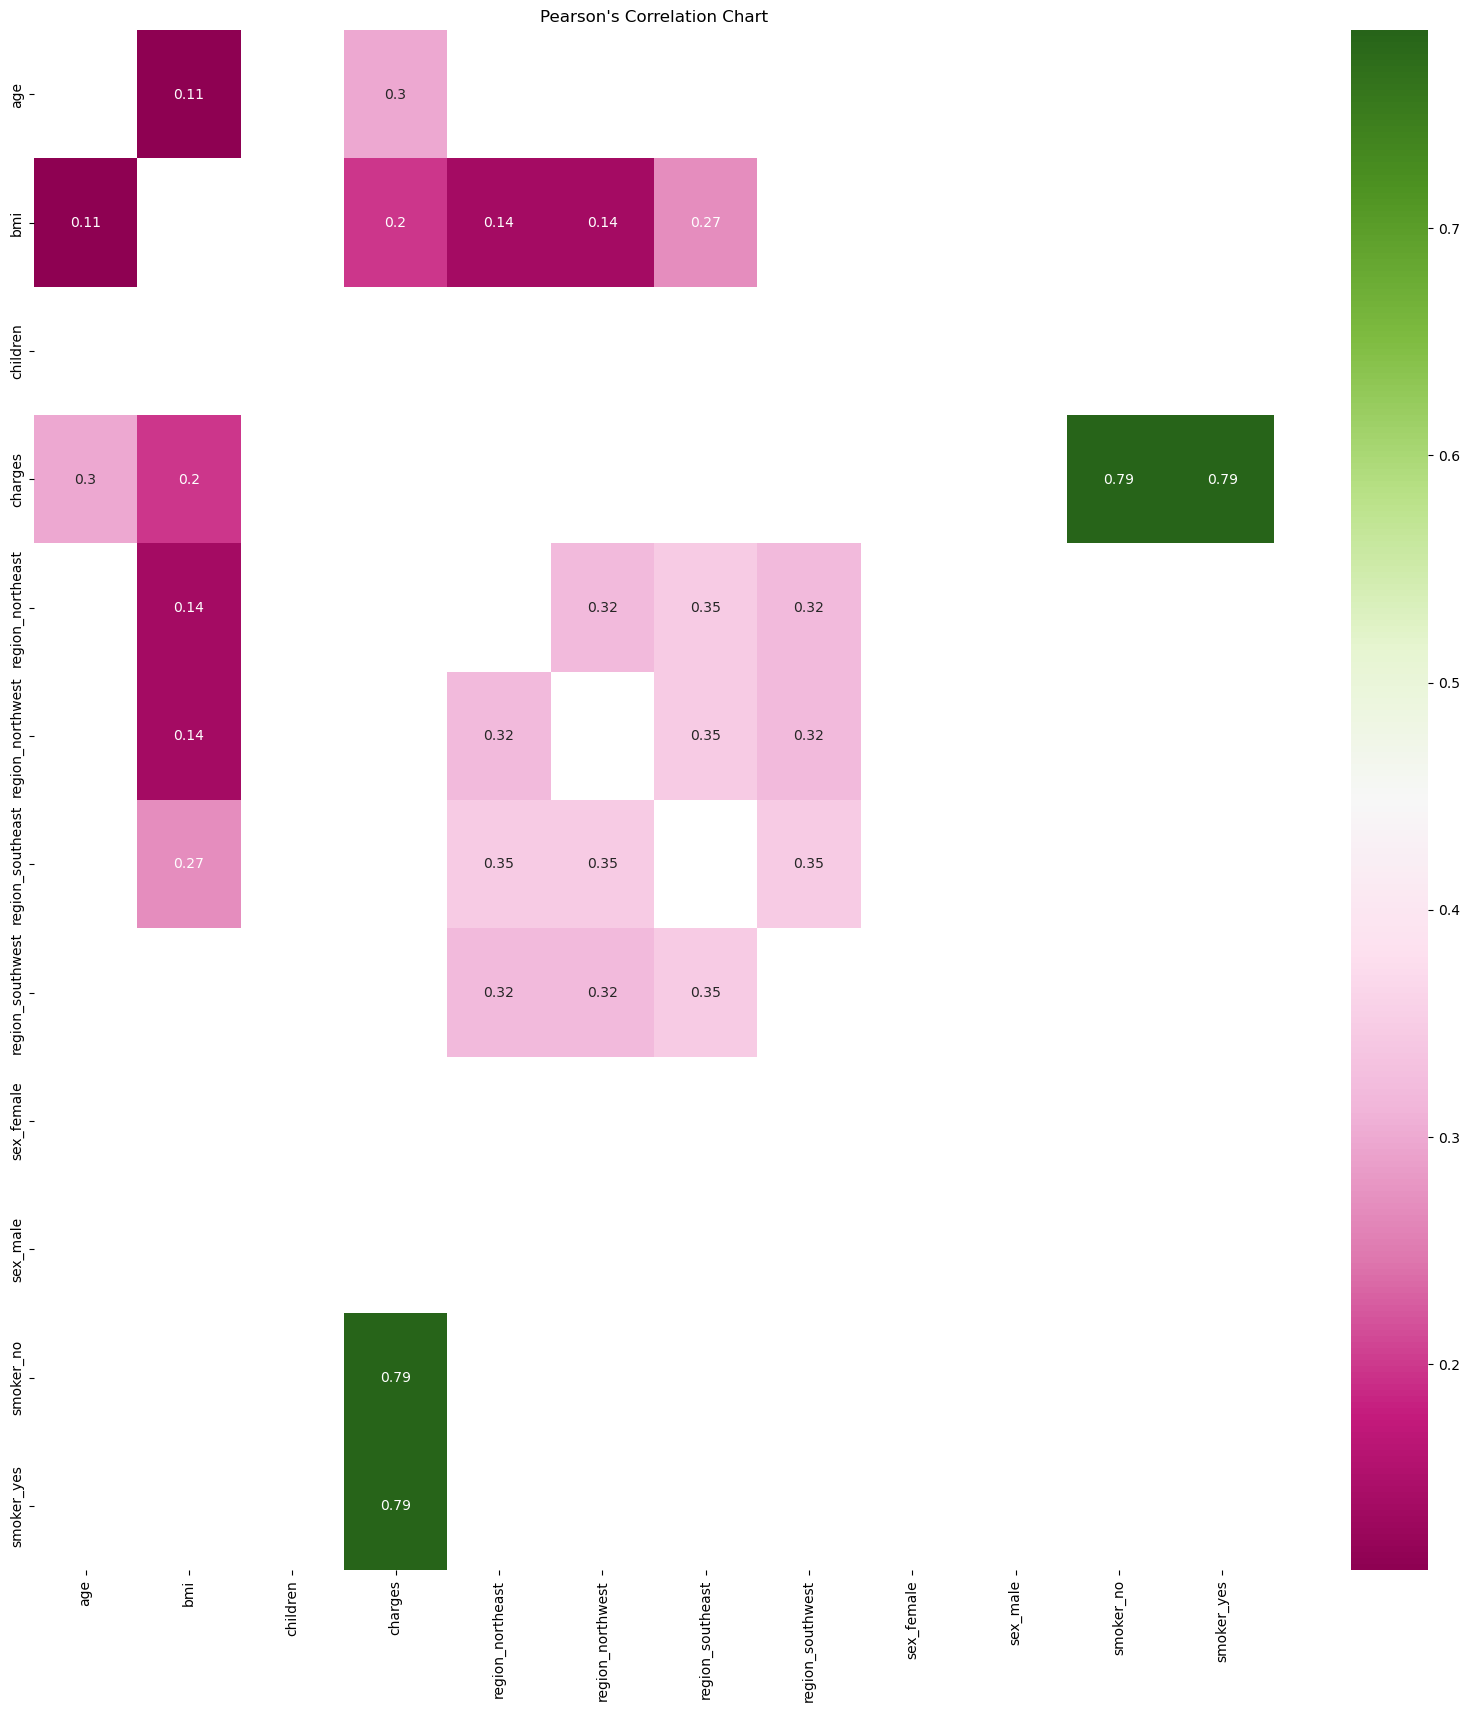

In [22]:
corr=abs(insurance4.corr())
plt.figure(figsize=(20,20))
sbn.heatmap(corr[(corr>0.1)&(corr<1)], cmap="PiYG", annot=True)
plt.title("Pearson's Correlation Chart") 

In [23]:
X= insurance4.drop('charges', axis=1)

In [24]:
y=insurance4['charges']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 700)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)

train_mse = mean_squared_error(y_train, train_predictions, squared=False)

coefficient = model.coef_

R2=r2_score(y_train, train_predictions)

print(f'root mean squared error is {train_mse:.7}')
print(f'R2 is {R2:.2}')

root mean squared error is 5917.19
R2 is 0.77


In [27]:
coefficient

array([   254.42181094,    374.43344952,    391.1458249 ,    882.95683302,
          -98.77998614,   -647.51957892,   -136.65726796,    -66.39059977,
           66.39059977, -12022.69388529,  12022.69388529])

In [28]:
coefficient_table=pd.DataFrame(data=coefficient,index=['age', 'bmi', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes'])
coefficient_table=coefficient_table.rename(columns={0:'coefficient'})
coefficient_table=coefficient_table.round(2)
intercept=model.intercept_

print(f'Intercept of the model is {intercept}')

coefficient_table

Intercept of the model is -1586.873381630905


,coefficient
age,254.42
bmi,374.43
children,391.15
region_northeast,882.96
region_northwest,-98.78
region_southeast,-647.52
region_southwest,-136.66
sex_female,-66.39
sex_male,66.39
smoker_no,-12022.69


Text(0, 0.5, '')

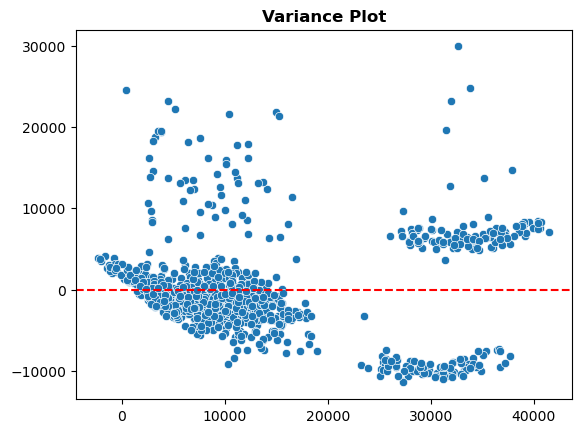

In [29]:
residuals=y_train-train_predictions
sbn.scatterplot(x=train_predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Variance Plot', weight='bold')
plt.ylabel('')

In [30]:
test_pred = model.predict(X_test)


R2=r2_score(y_test, test_pred)
test_rmse=mean_squared_error(y_test, test_pred, squared=False)

intercept_final=model.intercept_
coefficient_final=model.coef_

print(f'Intercept of the model is {intercept_final}')

print(f'root mean squared error is {test_rmse:.9}')
print(f'R2 is {R2:.2}')

Intercept of the model is -1586.873381630905
root mean squared error is 6362.41935
R2 is 0.69
